In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # pip install statsmodels

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

import keras
from keras import regularizers
from keras import layers

from keras.models import Sequential

from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LayerNormalization, BatchNormalization

import os


***
# DO NOT REMOVE

In [775]:
# root_logdir = os.path.join(os.curdir, "my_logs")

# def get_run_logdir(config):
#     import time
#     run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
#     return os.path.join(root_logdir, f"{run_id}-{config['epochs']}-{config['batch_size']}-{config['lr']}-{config['patience']}")

***

In [776]:
df = pd.read_csv('./df_agg_57.csv')
print(df.shape)
df.head()

(57, 117)


,storm,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,Georges,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,Isidore,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,Lili,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,Ivan,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,Dorian,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [777]:
all_original_columns = list(df.columns)
all_original_columns

['storm',
 'deaths',
 'min_time',
 'max_time',
 'avg_elevation',
 'min_elevation',
 'max_elevation',
 'med_elevation',
 'avg_temperature_2m',
 'min_temperature_2m',
 'max_temperature_2m',
 'med_temperature_2m',
 'avg_relativehumidity_2m',
 'min_relativehumidity_2m',
 'max_relativehumidity_2m',
 'med_relativehumidity_2m',
 'avg_dewpoint_2m',
 'min_dewpoint_2m',
 'max_dewpoint_2m',
 'med_dewpoint_2m',
 'avg_apparent_temperature',
 'min_apparent_temperature',
 'max_apparent_temperature',
 'med_apparent_temperature',
 'avg_precipitation',
 'min_precipitation',
 'max_precipitation',
 'med_precipitation',
 'avg_rain',
 'min_rain',
 'max_rain',
 'med_rain',
 'avg_pressure_msl',
 'min_pressure_msl',
 'max_pressure_msl',
 'med_pressure_msl',
 'avg_surface_pressure',
 'min_surface_pressure',
 'max_surface_pressure',
 'med_surface_pressure',
 'avg_cloudcover',
 'min_cloudcover',
 'max_cloudcover',
 'med_cloudcover',
 'avg_cloudcover_low',
 'min_cloudcover_low',
 'max_cloudcover_low',
 'med_cloudc

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 117 entries, storm to target_cost
dtypes: float64(99), int64(15), object(3)
memory usage: 52.2+ KB


In [779]:
num_df = df.copy()

In [780]:
num_df.drop(columns=['storm'], axis=1, inplace=True)

In [781]:
num_df.head()

,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [782]:
# Convert the datetime column to a timestamp format (seconds since epoch)
num_df['min_time'] = pd.to_datetime(num_df['min_time'])
num_df['max_time'] = pd.to_datetime(num_df['max_time'])
num_df['min_time'] = num_df['min_time'].view('int64') // 10**9
num_df['max_time'] = num_df['max_time'].view('int64') // 10**9
num_df.head()

,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,905817600,907200000,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,5,1031961600,1033084800,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,2,1032566400,1033689600,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,57,1094083200,1095984000,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,10,1566604800,1567987200,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [783]:
constant_columns = num_df.columns[num_df.nunique() <= 1]
constant_columns


Index(['min_precipitation', 'min_rain', 'max_cloudcover', 'min_cloudcover_low',
       'max_cloudcover_low', 'max_cloudcover_mid', 'max_cloudcover_high',
       'min_et0_fao_evapotranspiration', 'min_soil_moisture_0_to_7cm',
       'min_soil_moisture_7_to_28cm', 'min_soil_moisture_28_to_100cm',
       'min_soil_moisture_100_to_255cm'],
      dtype='object')

In [784]:
list(num_df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),


In [785]:
"""These columns don't provide any variability, and thus can't be correlated with other columns. 
When you try to compute the correlation of a constant column with any other column, the result is NaN (not a number) 
because the standard deviation of a constant column is zero, and you can't divide by zero in the correlation formula."""

constant_columns = num_df.columns[num_df.nunique() == 1]
constant_columns

Index(['min_precipitation', 'min_rain', 'max_cloudcover', 'min_cloudcover_low',
       'max_cloudcover_low', 'max_cloudcover_mid', 'max_cloudcover_high',
       'min_et0_fao_evapotranspiration', 'min_soil_moisture_0_to_7cm',
       'min_soil_moisture_7_to_28cm', 'min_soil_moisture_28_to_100cm',
       'min_soil_moisture_100_to_255cm'],
      dtype='object')

In [786]:
# Dropping constant columns
num_df = num_df.drop(columns=constant_columns)
print(num_df.shape)
num_df.head()

(57, 104)


,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,avg_soil_moisture_7_to_28cm,max_soil_moisture_7_to_28cm,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,905817600,907200000,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.15,0.52,0.0,0.13,0.52,0.0,0.11,0.50,0.0,11191.0
1,5,1031961600,1033084800,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.14,0.52,0.0,0.11,0.49,0.0,0.09,0.50,0.0,1943.5
2,2,1032566400,1033689600,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.07,0.52,0.0,0.06,0.51,0.0,0.05,0.44,0.0,1866.6
3,57,1094083200,1095984000,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.06,0.52,0.0,0.06,0.52,0.0,0.06,0.50,0.0,33005.8
4,10,1566604800,1567987200,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.04,0.44,0.0,0.03,0.43,0.0,0.02,0.38,0.0,1915.9


# Feature Correlations

In [787]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColorBar, LinearColorMapper, ColumnDataSource, HoverTool
from bokeh.transform import transform
from bokeh.layouts import column
from bokeh.models.tickers import BasicTicker

output_notebook()

correlation_data = num_df.corr()

correlation_matrix = pd.DataFrame({
    'x_name': correlation_data.columns.repeat(len(correlation_data.index)),
    'y_name': np.tile(correlation_data.index, len(correlation_data.columns)),
    'values': correlation_data.values.ravel()
})

# Filter correlation_matrix for abs(values) >= 0.8
correlation_matrix = correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

source = ColumnDataSource(correlation_matrix)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "darkred"]
mapper = LinearColorMapper(palette=colors, low=-1, high=1)  # As correlations range between -1 and 1

unique_factors = list(correlation_data.columns)
p = figure(title="Heatmap",
           x_range=unique_factors, y_range=unique_factors, tools="", width=1500, height=1500)

p.xaxis.major_label_orientation = "vertical"

p.rect(x="x_name", y="y_name", width=1, height=1, source=source,
       line_color='white', fill_color=transform('values', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')

# Adding hover tool for interactivity
hover = HoverTool()
hover.tooltips = [("X", "@x_name"), ("Y", "@y_name"), ("Correlation", "@values")]
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [788]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# import pandas as pd

# # Assume df is your DataFrame
# X = num_df.iloc[:, :-1]  # Predictor columns
# y = num_df['target_cost']  # Target column

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Fit model
# model = LinearRegression()
# model.fit(X_scaled, y)

# # Get feature importances (coefficients in this case)
# feature_importance = model.coef_

# # Pair feature names with importance
# features_list = list(X.columns)
# feature_importance_list = list(zip(features_list, feature_importance))

# # Sort by absolute value of coefficient
# sorted_features = sorted(feature_importance_list, key=lambda x: abs(x[1]), reverse=True)

# # Select top 50 features
# top_50_features = [feature for feature, _ in sorted_features[:50]]

# print("Top 50 most influential features:", top_50_features)



In [789]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# # Assume X and y are your predictors and target variable
# X = num_df.iloc[:, :-1]  # Predictor columns
# y = num_df['target_cost']  # Target column

# # Fit OLS model
# X_with_const = sm.add_constant(X_scaled)  # Adds constant term to predictors
# ols_model = sm.OLS(y, X_with_const).fit()

# # Residuals
# residuals = ols_model.resid

# # Fitted values
# fitted = ols_model.fittedvalues

# # Residual vs Fitted plot for Linearity and Homoscedasticity
# plt.scatter(fitted, residuals)
# plt.axhline(0, color='r', linestyle='--')
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.show()

# # QQ plot for Normality
# sm.qqplot(residuals, line='s')
# plt.show()

# # VIF for Multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# print(vif_data)


In [790]:
# top_50_features

In [791]:
# len(top_predictors)

In [792]:
correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [793]:
correlation_matrix

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [794]:
prep_corr = correlation_matrix.copy()
prep_corr

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [795]:
corrs_to_review = prep_corr[prep_corr['x_name'] != prep_corr['y_name']]
# corrs_to_review.to_csv('./corrs_to_review.csv', index=False)

In [796]:
reduced_df = num_df.copy()
# reduced_df.drop(columns=['avg_rain', 
#                         'med_rain', 
#                         'avg_dewpoint_2m', 
#                         'med_dewpoint_2m', 
#                         'min_dewpoint_2m', 
#                         'min_temperature_2m', 
#                         'med_temperature_2m',
#                         'avg_temperature_2m',
#                         'max_time',
#                         'avg_soil_moisture_0_to_7cm',
#                         'avg_soil_moisture_100_to_255cm',
#                         'med_vapor_pressure_deficit',
#                         'avg_soil_temperature_0_to_7cm',
#                         'avg_windspeed_10m',
#                         'max_soil_temperature_7_to_28cm',
#                         'min_soil_temperature_7_to_28cm',
#                         'avg_soil_temperature_7_to_28cm',
#                         'med_soil_temperature_7_to_28cm'
#                         ], 
#                         axis=1, inplace=True)

# reduced_df.drop(columns=[
#     'avg_rain',
#     'max_rain',
#     'med_rain',
#     'deaths',
    
#     ], 
#     axis=1, inplace=True)
reduced_df.shape

(57, 104)

In [797]:
# Find columns with only one unique value
single_value_columns = reduced_df.columns[reduced_df.nunique() == 1].tolist()
single_value_columns

[]

In [798]:
# Compute correlation matrix
correlation_matrix = reduced_df.corr()

# Find columns with absolute correlation > 0.8
columns_to_drop = set()
dropped = set()

for col in correlation_matrix.columns:
    if col not in dropped:
        # Exclude self-correlation
        correlated_cols = correlation_matrix.index[(correlation_matrix[col].abs() > 0.8) & (correlation_matrix.index != col)]
        for correlated_col in correlated_cols:
            columns_to_drop.add(correlated_col)
            dropped.add(correlated_col)

# Drop those columns
reduced_df.drop(columns=columns_to_drop, inplace=True)
reduced_df.drop(columns=['deaths'], inplace=True)

reduced_df.shape



(57, 45)

In [799]:
output_notebook()

correlation_data = reduced_df.corr()

correlation_matrix = pd.DataFrame({
    'x_name': correlation_data.columns.repeat(len(correlation_data.index)),
    'y_name': np.tile(correlation_data.index, len(correlation_data.columns)),
    'values': correlation_data.values.ravel()
})

# Filter correlation_matrix for abs(values) >= 0.8
# correlation_matrix = correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

source = ColumnDataSource(correlation_matrix)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "darkred"]
mapper = LinearColorMapper(palette=colors, low=-1, high=1)  # As correlations range between -1 and 1

unique_factors = list(correlation_data.columns)
p = figure(title="Heatmap",
           x_range=unique_factors, y_range=unique_factors, tools="", width=1500, height=1500)

p.xaxis.major_label_orientation = "vertical"

p.rect(x="x_name", y="y_name", width=1, height=1, source=source,
       line_color='white', fill_color=transform('values', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')

# Adding hover tool for interactivity
hover = HoverTool()
hover.tooltips = [("X", "@x_name"), ("Y", "@y_name"), ("Correlation", "@values")]
p.add_tools(hover)

show(p)

Loading BokehJS ...

In [800]:
reduced_df.shape

(57, 45)

In [801]:
reduced_columns = list(reduced_df.columns)
reduced_columns

['min_time',
 'avg_elevation',
 'min_elevation',
 'max_elevation',
 'med_elevation',
 'avg_temperature_2m',
 'min_temperature_2m',
 'max_temperature_2m',
 'med_temperature_2m',
 'avg_relativehumidity_2m',
 'min_relativehumidity_2m',
 'max_relativehumidity_2m',
 'max_dewpoint_2m',
 'avg_apparent_temperature',
 'avg_precipitation',
 'max_precipitation',
 'avg_pressure_msl',
 'min_pressure_msl',
 'max_pressure_msl',
 'avg_surface_pressure',
 'avg_cloudcover',
 'min_cloudcover',
 'avg_cloudcover_low',
 'min_cloudcover_mid',
 'avg_cloudcover_high',
 'med_cloudcover_high',
 'avg_et0_fao_evapotranspiration',
 'max_et0_fao_evapotranspiration',
 'med_et0_fao_evapotranspiration',
 'avg_windspeed_10m',
 'min_windspeed_10m',
 'avg_winddirection_10m',
 'max_winddirection_10m',
 'max_winddirection_100m',
 'min_windgusts_10m',
 'max_soil_temperature_0_to_7cm',
 'max_soil_temperature_7_to_28cm',
 'avg_soil_temperature_100_to_255cm',
 'min_soil_temperature_100_to_255cm',
 'max_soil_temperature_100_to_2

In [802]:
from sklearn.model_selection import train_test_split


X_optim = reduced_df.drop('target_cost', axis=1)  # Explanatory variables
y_optim = reduced_df['target_cost']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X_optim, y_optim, test_size=0.2, random_state=42)


base_adj_rsq = model_base.rsquared_adj 
X_cols = X_optim.columns.tolist()

X_optimizer = X_optim.copy()

# while len(X_cols) > 0:
removed_col = None
curr_adj_rsq = -np.inf  

for col in X_cols:
    if col in X_optimizer.columns: 
        X_optimizer = X_optimizer.drop(columns=col, axis=1)
        X_optimizer = sm.add_constant(X_optimizer)
        model_opt = sm.OLS(y_train, X_train).fit()
        
        if model_opt.rsquared_adj >= curr_adj_rsq:
            curr_adj_rsq = model_opt.rsquared_adj
        
        elif model_opt.rsquared_adj < curr_adj_rsq:
            # removed_col = col
            X_optimizer.drop(columns=col, axis=1, inplace=True)




    # if curr_adj_rsq > base_adj_rsq:
    #     X_optim.drop(columns=removed_col, inplace=True)
    #     base_adj_rsq = curr_adj_rsq
    # else:
    #     break  # Stop the loop if no improvement in adjusted R-squared

# Final Optimized Model
# X_optim = sm.add_constant(X_optim)
# optimized_model = sm.OLS(y_optim, X_optim).fit()
optimized_model = model_opt

# Features with Positive Impact
positive_impact_features = [feature for feature, coef in optimized_model.params.items() if coef > 0]



best_X = X_train[['avg_elevation',
                'max_elevation',
                'avg_temperature_2m',
                'max_temperature_2m',
                'avg_relativehumidity_2m',
                'min_relativehumidity_2m',
                'max_relativehumidity_2m',
                'max_dewpoint_2m',
                'avg_apparent_temperature',
                'avg_surface_pressure',
                'min_cloudcover',
                'avg_cloudcover_low',
                'med_cloudcover_high',
                'avg_windspeed_10m',
                'min_windspeed_10m',
                'max_winddirection_100m',
                'max_soil_temperature_0_to_7cm',
                'max_soil_temperature_7_to_28cm',
                'min_soil_temperature_100_to_255cm',
                'max_soil_temperature_100_to_255cm']]

best_model = sm.OLS(y_train, best_X).fit()

positive_impact_features, optimized_model.summary(), best_model.summary()


(['avg_elevation',
  'max_elevation',
  'avg_temperature_2m',
  'max_temperature_2m',
  'avg_relativehumidity_2m',
  'min_relativehumidity_2m',
  'max_relativehumidity_2m',
  'max_dewpoint_2m',
  'avg_apparent_temperature',
  'avg_surface_pressure',
  'min_cloudcover',
  'avg_cloudcover_low',
  'med_cloudcover_high',
  'avg_windspeed_10m',
  'min_windspeed_10m',
  'max_winddirection_100m',
  'max_soil_temperature_0_to_7cm',
  'max_soil_temperature_7_to_28cm',
  'min_soil_temperature_100_to_255cm',
  'max_soil_temperature_100_to_255cm'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:            target_cost   R-squared (uncentered):                   0.980
 Model:                            OLS   Adj. R-squared (uncentered):              0.542
 Method:                 Least Squares   F-statistic:                              2.240
 Date:                Tue, 31 Oct 2023   Prob (F-st

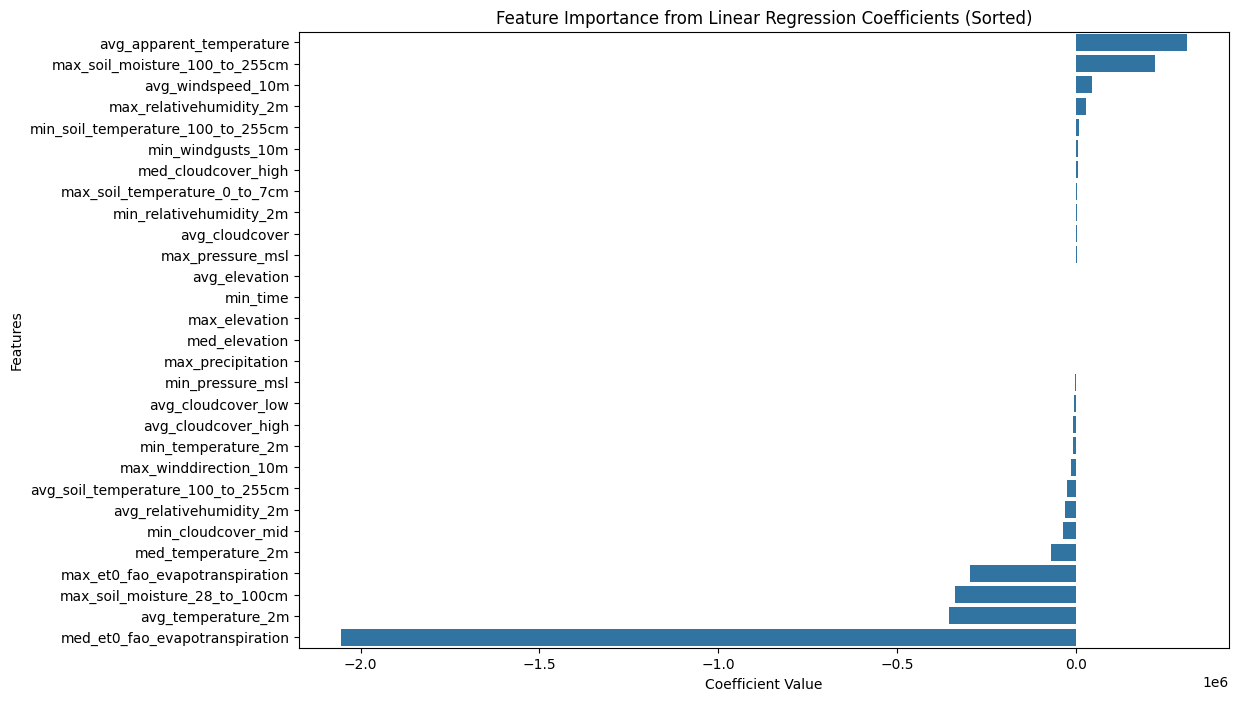

In [626]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and feature names
coefs = optimized_model.params.drop('const')  # Exclude the intercept
coefs_sorted = coefs.sort_values(ascending=False)  # Sort coefficients from high to low
features_sorted = coefs_sorted.index

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=features_sorted, x=coefs_sorted.values, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance from Linear Regression Coefficients (Sorted)')
plt.show()

